In [121]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense
import tensorflow as tf
import time
import numpy as np

In [109]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

0


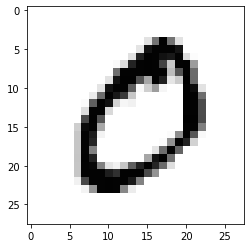

4


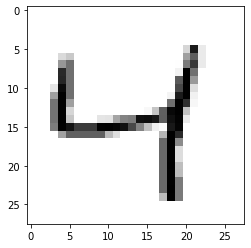

1


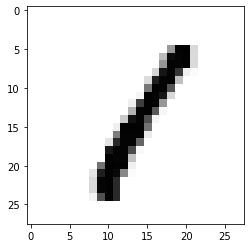

9


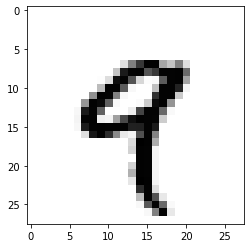

In [110]:
image_indexes = list(range(1,5))
for i in image_indexes:
    print(y_train[i])
    plt.imshow(x_train[i], cmap='Greys')
    plt.show()

In [116]:
def create_model(image_w, image_h):
   # Neural network model
   model = Sequential()
   model.add(Dense(784, activation='relu', input_shape=(image_w*image_h,))) #784=28*28, internal layer
   model.add(Dense(10, activation='softmax')) #digits 0..9, count=10
   model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
   return model

In [119]:
def train_model(model):
   image_size = x_train.shape[1]
   num_classes = 10
   train_data = x_train.reshape(x_train.shape[0], image_size**2).astype('float32')
   test_data = x_test.reshape(x_test.shape[0], image_size**2).astype('float32')
   train_data /= 255.0
   test_data /= 255.0
   train_cat = keras.utils.to_categorical(y_train, num_classes)
   test_cat = keras.utils.to_categorical(y_test, num_classes)
   model.fit(train_data, train_cat, epochs=8, batch_size=64, 
verbose=1, validation_data=(test_data, test_cat))
    

In [120]:
model = create_model(image_w=28, image_h=28)
train_model(model)
model.save('model.h5')

Epoch 1/8
938/938 [==============================] - 17s 18ms/step - loss: 0.2073 - accuracy: 0.9384 - val_loss: 0.1044 - val_accuracy: 0.9669
Epoch 2/8
938/938 [==============================] - 15s 17ms/step - loss: 0.0857 - accuracy: 0.9746 - val_loss: 0.0811 - val_accuracy: 0.9766
Epoch 3/8
938/938 [==============================] - 15s 16ms/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.0827 - val_accuracy: 0.9760
Epoch 4/8
938/938 [==============================] - 15s 17ms/step - loss: 0.0420 - accuracy: 0.9877 - val_loss: 0.0678 - val_accuracy: 0.9822
Epoch 5/8
938/938 [==============================] - 16s 17ms/step - loss: 0.0314 - accuracy: 0.9906 - val_loss: 0.0885 - val_accuracy: 0.9775
Epoch 6/8
938/938 [==============================] - 16s 17ms/step - loss: 0.0237 - accuracy: 0.9931 - val_loss: 0.0802 - val_accuracy: 0.9802
Epoch 7/8
938/938 [==============================] - 16s 17ms/step - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.0814 - val_accuracy: 0.9808

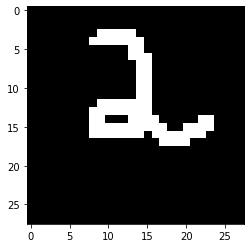

result = 2


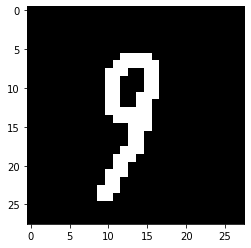

result = 9


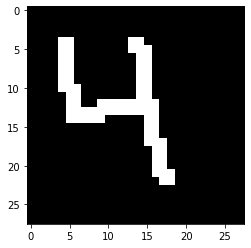

result = 4


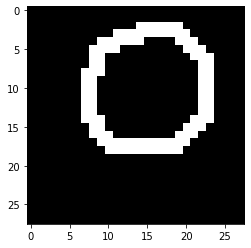

result = 6


In [126]:
def predict(model, image_file):
   image_size = 28
   img = keras.preprocessing.image.load_img(image_file, target_size=(image_size, image_size), color_mode='grayscale')
   plt.imshow(img, cmap='Greys')
   plt.show()
   img_arr = np.expand_dims(img, axis=0)
   img_arr = 1 - img_arr/255.0
   
   img_arr = img_arr.reshape((1, image_size**2))
   result = model.predict_classes([img_arr])
   return result[0]

model = tf.keras.models.load_model('model.h5')
print('result = ' + str(predict(model, 'num_2.png')))
print('result = ' + str(predict(model, 'num_9.png')))
print('result = ' + str(predict(model, 'num_4.png')))
print('result = ' + str(predict(model, 'num_0.png')))